In [5]:
import numpy as np
import ads
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# help(ads.SearchQuery)
"""
first_paper.abstract              first_paper.build_citation_tree   first_paper.first_author_norm     first_paper.keys                  first_paper.pubdate
first_paper.aff                   first_paper.build_reference_tree  first_paper.id                    first_paper.keyword               first_paper.read_count
first_paper.author                first_paper.citation              first_paper.identifier            first_paper.metrics               first_paper.reference
first_paper.bibcode               first_paper.citation_count        first_paper.issue                 first_paper.page                  first_paper.title
first_paper.bibstem               first_paper.database              first_paper.items                 first_paper.property              first_paper.volume
first_paper.bibtex                first_paper.first_author          first_paper.iteritems             first_paper.pub                   first_paper.year

"""

In [15]:
### JOURNALS TO SEARCH
Journals = ["The Astrophysical Journal", "Monthly Notices of the Royal Astronomical Society", "The Astronomical Journal", "Astronomy and Astrophysics"]
Journals = ["Geophysical Research Letters", "Icarus", "Planetary and Space Science", "Meteoritics", "Astrobiology"]

### TERMS TO LOOK FOR
Terms = ["Machine Learning", "Deep Learning", "Artificial Intelligence"]

### YEARS TO TRACK
Years = np.arange(2000, 2020)

### INFO TO GRAB FOR EACH ENTRY
Fields = ['title', 'citation_count', 'identifier', 'keyword', 'property', 'pub', 'year']

In [16]:
nArt, Arts = [], []

### LOOP OVER EACH YEAR
for yr in Years:
        
    ### LOOP OVER EACH JOURNAL
    tmp, tmp2 = [], []
    for jn in Journals:
    
        ### SEARCH FOR ALL PAPERS IN THIS JOURNAL PUBLISHED IN THIS YEAR THAT CONTAIN THE DESIRED TERM
        papers = list(ads.SearchQuery(q=Terms[0], fl=Fields, sort="citation_count", year=yr, pub=jn, rows=2000, max_pages=20))
        tmp.append(len(papers))
        tmp2 += papers

    ### LOG THE NUMBER OF ARTICLES PER JOURNAL PER YEAR
    print("\t{0:0}\t{1}".format(yr, tmp))
    nArt.append(tmp)
    Arts += tmp2
    
### SUM THE NUMBER OF ARTICLES PER YEAR
nArt2 = [np.sum(x) for x in nArt]  

	2000	[0, 0, 0, 0, 0]
	2001	[0, 0, 0, 0, 0]
	2002	[0, 0, 0, 0, 0]
	2003	[0, 0, 0, 0, 0]
	2004	[2, 0, 0, 0, 0]
	2005	[1, 0, 0, 0, 0]
	2006	[2, 0, 0, 0, 0]
	2007	[4, 0, 0, 0, 0]
	2008	[2, 0, 0, 0, 0]
	2009	[2, 1, 0, 0, 0]
	2010	[0, 0, 0, 0, 1]
	2011	[2, 0, 0, 0, 0]
	2012	[2, 0, 0, 0, 0]
	2013	[1, 0, 0, 0, 0]
	2014	[1, 0, 0, 0, 1]
	2015	[2, 0, 0, 0, 0]
	2016	[3, 0, 2, 0, 1]
	2017	[6, 0, 0, 0, 0]
	2018	[12, 0, 0, 0, 1]
	2019	[18, 1, 0, 0, 0]


In [17]:
# nAstro = np.copy(nArt2)
# aAstro = np.copy(Arts)

# nPS = np.copy(nArt2)
# aPS = np.copy(Arts)

In [34]:
### THIS EXTRACTS THE HELIOPHYSICS ARTICLES FROM THE ASTRO ARTICLES
count, yr_helio = 0, []
for p, paper in enumerate(aAstro):
        
    try:
        if ('helio' in ' '.join(paper.keyword)) | ('Sun' in ' '.join(paper.keyword)) :   
            yr_helio.append(int(paper.year))
#             print(paper.title, paper.pub, paper.year)
    except:
        count+=1

nHelio = [yr_helio.count(x) for x in Years]

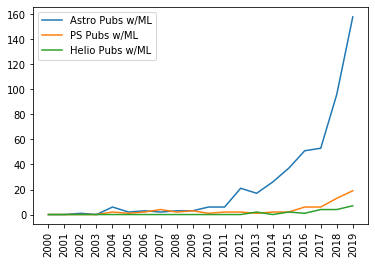

In [35]:
plt.plot(Years, nAstro, label='Astro Pubs w/ML')
plt.plot(Years, nPS, label='PS Pubs w/ML')
plt.plot(Years, nHelio, label='Helio Pubs w/ML')
plt.xticks(ticks=Years, rotation=90);
plt.legend();